# iAR package Demo

In [1]:
import iar
import numpy as np
import matplotlib.pyplot as plt
print("iAR version:")
print(iar.__version__)

iAR version:
1.0.0


# Simulates from an IAR Model

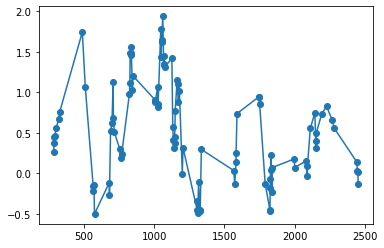

In [2]:
from iar import IAR_sample,gentime
np.random.seed(6713)
sT=gentime(n=100)
y,sT =IAR_sample(0.99,100,sT)

plt.plot(sT,y,"o-")
plt.show()

# Maximum Likelihood Estimation of the IAR Model

In [3]:
from iar import IAR_phi_loglik,IAR_loglik
phi=IAR_loglik(y,sT,0)
print("Estimated parameter:",np.round(phi,4))

Estimated parameter: 0.9907


# Simulates from an IAR Gamma Model

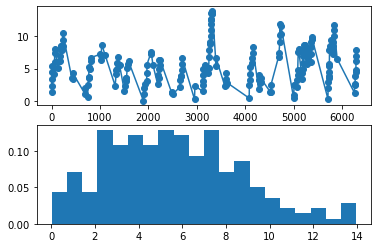

In [4]:
from iar import IARg_sample
np.random.seed(12917)
sT=gentime(n=200)
y,sT =IARg_sample(0.99,200,sT,sigma2=3,mu=1)

plt.subplot(2,1,1)
plt.plot(sT,y,"o-")
plt.subplot(2,1,2)
plt.hist(y,bins=20,density=1)
plt.show()


# Maximum Likelihood Estimation of the IAR-Gamma Model

In [5]:
from iar import IAR_gamma
phi,mu,sigma,loglik=IAR_gamma(y,sT)
print("Estimated parameter:",np.round(phi,4))
print("Estimated mean:",np.round(mu,4))
print("Estimated standard deviation:",np.round(sigma,4))

Estimated parameter: 0.9908
Estimated mean: 0.9779
Estimated standard deviation: 2.888


# Simulates from an IAR T Model

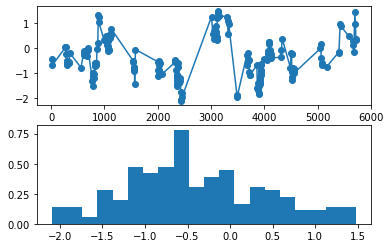

In [6]:
from iar import IARt_sample
np.random.seed(6713)
sT=gentime(n=200)
y,sT =IARt_sample(0.99,200,sT,sigma2=1,nu=3)

plt.subplot(2,1,1)
plt.plot(sT,y,"o-")
plt.subplot(2,1,2)
plt.hist(y,bins=20,density=1)
plt.show()

# Maximum Likelihood Estimation of the IAR-Gamma Model

In [7]:
from iar import IAR_t
phi,sigma,loglik=IAR_t(y,sT,nu=3)
print("Estimated parameter:",np.round(phi,4))
print("Estimated standard deviation:",np.round(sigma,4))

Estimated parameter: 0.9909
Estimated standard deviation: 1.1252


# Test for the significance of the autocorrelation estimated by the IAR model in periodic irregularly observed time series

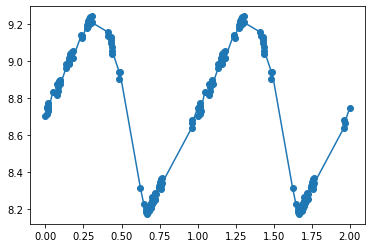

In [8]:
from iar import data_iar,foldlc
import pandas as pd
data=data_iar.clcep()
t=data["t"]
m=data["m"]
merr=data["merr"]
f1=0.060033386
folded_data=foldlc(t,m,merr,f1)

In [9]:
from iar import harmonicfit
res,sT=harmonicfit(t,m,f1)
#Standarized Data
y=res/np.sqrt(np.var(res,ddof=1)) 
phi=IAR_loglik(y,sT,0,True)
print(phi)
#Unstandardized Data
#phi=IAR_loglik(res,sT,0,False) 

6.677184064819117e-05


6.677184064819117e-05
[-0.18086971  0.06687312]
-9.614229113480432
0.0


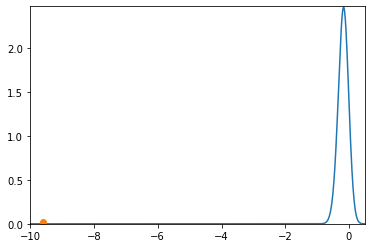

In [10]:
from iar import IAR_Test
phi,norm,z0,pvalue=IAR_Test(m,sT,f1,phi,plot=True,xlim=(-10,0.5))
#phi,norm,z0,pvalue=IAR_Test(m,sT,f1,phi,plot=False) #Without Plot
print(phi)
print(norm)
print(z0)
print(pvalue)